In [1]:
import xgboost as xgb
import xarray as xr
import pandas as pd
import numpy as np
import gc
from flaml import AutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import logging 
import pickle
import seaborn as sns
# logging.disable(logging.CRITICAL)
# import shap

rc={'axes.labelsize': 12.0,
    'font.size': 12.0, 'legend.fontsize': 12.0, 
    'axes.titlesize': 12.0,
    'xtick.labelsize': 12.0,
    'ytick.labelsize': 12.0}
plt.rcParams.update(**rc)

In [2]:
loc_ls = ["E","S","W","N","C","A"]

## daily

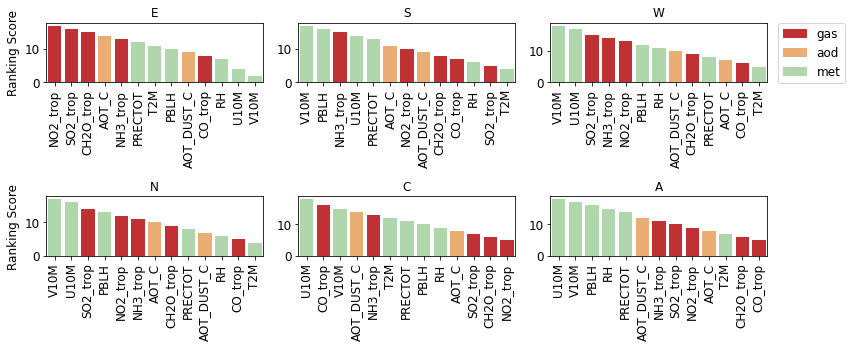

In [3]:
df = pd.read_csv("./ranking/daily_all.csv")

fig = plt.figure(figsize=(12,5))
for i in range(len(loc_ls)):
    loc = loc_ls[i]
    ax = fig.add_subplot(2,3,i+1)
    df_tmp = df[df["location"]==loc].sort_values("ranking",ascending=False)
    df_plot = df_tmp[df_tmp["category"]!="emission"]
    g = sns.barplot(x="features",y="ranking", hue="category", hue_order=["gas","aod","met"],
                    data=df_plot, dodge=False, palette = ["#d7191c","#fdae61","#abdda4"], ax=ax)
    if i==2:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        g.get_legend().remove()
    if (i%3)!=0:
        g.set_ylabel("")
    else:
        ax.set_ylabel("Ranking Score")
    plt.xticks(rotation=90)
    ax.set_xlabel("")
    ax.set_title(loc)
    plt.tight_layout()

plt.savefig("../figures/fig4_individual_ranking.pdf")
plt.show()

## monthly

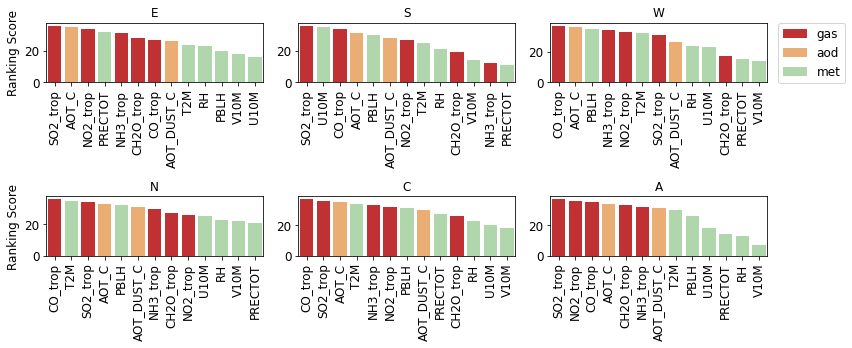

In [4]:
df = pd.read_csv("./ranking/monthly_all.csv")

fig = plt.figure(figsize=(12,5))
for i in range(len(loc_ls)):
    loc = loc_ls[i]
    ax = fig.add_subplot(2,3,i+1)
    df_tmp = df[df["location"]==loc].sort_values("ranking",ascending=False)
    df_plot = df_tmp[df_tmp["category"]!="emission"]
    g = sns.barplot(x="features",y="ranking", hue="category", hue_order=["gas","aod","met"],
                    data=df_plot, dodge=False, palette = ["#d7191c","#fdae61","#abdda4"], ax=ax)
    if i==2:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        g.get_legend().remove()
    if (i%3)!=0:
        g.set_ylabel("")
    else:
        ax.set_ylabel("Ranking Score")
    plt.xticks(rotation=90)
    ax.set_xlabel("")
    ax.set_title(loc)
    plt.tight_layout()
    
plt.savefig("../figures/fig5_individual_ranking.pdf")
plt.show()